[ 7.74 26.1   9.33 29.7   9.43  6.09 21.28]
29.7029703
11
[[0.0773645546, 0.2609922918]]
0.2609922918
0.0933333333
0.0933333333


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

# Pretty display for notebooks
%matplotlib inline

In [5]:
#SVM 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def Bank_svm(X,Y):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

    
    #Scaling data
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.model_selection import cross_val_score

    #sc = StandardScaler(with_mean=False)
    
    
    #sc.fit(X_train)
    #X_train_std = sc.transform(X_train)
    #X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=0, gamma=.001, C=1.0,probability=True)
    svm.fit(X_train, Y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))
    print('####Train prediction Label###############################################')
    Y_train_pred=svm.predict(X_train)
    #print(y_1)
    Y_test_pred=svm.predict(X_test)

    print('####Actual Train Label###############################################')
    e=svm.predict_proba(X_test)

    print(e)
    print(Y_test_pred)
    print('####Change to colors###############################################')
        
    
    return X_test,Y_test_pred,Y_test,e

Populating the interactive namespace from numpy and matplotlib


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
#without accuracy ---> 2
def main(datax, y_test, y_test_pred,e): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = np.zeros((s, n), dtype = int)
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                data[j][i]= datax.iloc[j,i]
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("ACTUAL----------total ,accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP)
    
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        prec=0
        reca=0
        accur=0
        FP=0
        FN=0
        TP=0
        TN=0
        for i in range(n):
             if data[j][i]== 1 :
                    a=a+1
                    if r2[i]==1:
                        acc1=acc1+1 
                        if r[i]==1:
                            TP=TP+1
                        else:
                             FP=FP+1                
                    else:
                        if r[i]==1:
                            FN=FN+1
                        else:
                            TN=TN+1    
        
        print("prec reca accuracy for each sens") 
        prec= float(TP/(TP+FP))
        reca= float(TP/(TP+FN))
        accur= float((TP+TN)/a)
        print(prec,reca,accur)
        
        
        print("SVM----------total , accepted, aceeptance rate:")             
        
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP) 
    
    print("SVM accuracy--------------------------")
    prec=0
    reca=0
    accur=0
    FP=0
    FN=0
    TP=0
    TN=0
    for i in range(n):
            if r2[i]==1:
                acc1=acc1+1 
                if r[i]==1:
                    TP=TP+1
                else:
                     FP=FP+1                
            else:
                if r[i]==1:
                     FN=FN+1
                else:
                     TN=TN+1    

        
    prec= float(TP/(TP+FP))
    reca= float(TP/(TP+FN))
    accur= float((TP+TN)/n)
    print(prec,reca,accur)
    
    
######################
    delta=1

    epsilon=[.02]
    
    #beta_converge = [0.06012, 0.07744,.1,.15,.2,.25]
    beta_converge = [.08,.09]
    alpha = [0,0.2,0.4,0.6,0.8,1]
    
    
    prec_all=np.zeros((6,6),dtype=float)
    rec_all=np.zeros((6,6),dtype=float)
    acc_rate=np.zeros((6,6),dtype=float)
   
    fi= np.zeros(n,dtype=int) 
    
    t=0
    gamma  = [ 0.290, 0.067, 0.071, 0.102, 0.056, 0.043]
   
    for eps in epsilon:
        print("----------------This is for epsilon = ",eps, " ----------------")
        for beta_avg in beta_converge:
            t=0
            print("----------------This is for covergence at beta = ",beta_avg, " ----------------")
            for a in alpha:
                
                # no weighting basic weighting 1
                u1,u2=min_sum_lpca_g(data,gamma,eps,e,beta_avg,a)
                #######################Disp_impact#######################  
                print("alpha, beta_avg,eps",a,beta_avg,eps)
                accu_all=[]
                DP_all=[]
                precision_all=[]
                recall_all=[]
                ar_all=[]
                
                
                count=0
                print("<--------------------------------------->")
                print("iteration t",t)
       
                for i in range(n):
                     fi[i] = u1[i]


                for j in range(s):
                    print("sensitive attribute ",(j+1)) 

                    TP=0
                    FP=0
                    FN=0
                    TN=0
                    precision=0
                    recall=0
                    for i in range(n):
                         if data[j][i]== 1 :                        
                            if fi[i]==1 and r[i]==1:
                                TP=TP+1
                            if fi[i]==1 and r[i]==-1:
                                FP=FP+1 
                            if fi[i]==-1 and r[i]==1:
                                FN=FN+1
                            if fi[i]==-1 and r[i]==-1:
                                TN=TN+1    
                    if TP+FP !=0:
                        precision=float(TP/(TP+FP))
                    #print("precision",precision)
                    if TP+FN !=0:    
                        recall=float(TP/(TP+FN))
                   # print("recall",recall)

                    precision_all.append(precision)
                    recall_all.append(recall)
                    
                    
                    #print("TP,FP,TN,FN")
                    #print(TP,FP,TN,FN)

                    a=0
                    b=0
                    acc1=0
                    acc2=0
                    for i in range(n):
                            if data[j][i]== 1 :
                                a=a+1
                                if fi[i]==1:
                                     acc1=acc1+1 
        #                         print("total ,fair accepted, aceeptance rate:")             
                    a1=float(acc1/a)
        #                         print(a)
        #                         print(acc1)
        #                         print(a1)
                    ar_all.append(a1)
            
                    prec_all[t][j]=np.round(precision,4)
                    rec_all[t][j]=np.round(recall,4)
                    acc_rate[t][j]=np.round(a1,4)
                
                t=t+1
                count = count+1
                maxi=max(ar_all)
                mini= min(ar_all)
                DP=float(maxi-mini)
                print("individual acceptance rates")
                print(ar_all)
                print("individul precision")
                print(precision_all)
                print("individual recall")
                print(recall_all)
                print("DP all")
                print(DP)
                f_acc=0
                for i in range(n):
                     if fi[i] == r[i]:
                            f_acc=f_acc+1
                f_acc_l=float((f_acc*100)/n) 

        #######################################################################33   

        #                         print("sensitive attribute ",(j+1)) 





                TP=0
                FP=0
                FN=0
                TN=0
                precision=0
                recall=0
                accu=0
                for i in range(n):
                        if fi[i]==1 and r[i]==1:
                            TP=TP+1
                        if fi[i]==1 and r[i]==-1:
                            FP=FP+1 
                        if fi[i]==-1 and r[i]==1:
                            FN=FN+1
                        if fi[i]==-1 and r[i]==-1:
                            TN=TN+1    
                if TP+FP!=0:
                    precision=float(TP/(TP+FP))
                print("precision all",precision)                
                if TP+FN!=0:
                    recall=float(TP/(TP+FN))
                print("recall all",recall)
                accu=float((TP+TN)/(TP+FN+TN+FP))
                print("accuracy all",accu)
                accu_all.append(accu)
                print("TP,FP,TN,FN")
                print(TP,FP,TN,FN)
        #                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)
    print("<--------------------------------------->")
    alpha_weight=np.arange(0,1.2,.2)        
    return accu_all,DP_all,acc_rate,alpha_weight,prec_all,rec_all

In [8]:

#NG
import time
import pulp as p 
def min_sum_lpca_g(data1,beta,eps,e,beta_avg,alpha):
    import pulp as p 
    import math
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    
    ################ sorted result
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]
    h6=[]
   
    key1=[]
    key2=[]
    key3=[]
    key4=[]
    key5=[]
    key6=[]
   
    cost=np.zeros(n,dtype=int)
    data2=np.zeros((m,n),dtype=int)
    for i in range(n):
        if data1[0][i]==1:            
            h1.append(e[i][1])
            key1.append(i)

        elif data1[1][i]==1:
            h2.append(e[i][1])
            key2.append(i)
            
        if data1[2][i]==1:
            h3.append(e[i][1])
            key3.append(i)
            
        elif data1[3][i]==1:
            h4.append(e[i][1])
            key4.append(i)
        elif data1[4][i]==1:
            h5.append(e[i][1])
            key5.append(i)
        elif data1[5][i]==1:
            h6.append(e[i][1])
            key6.append(i)
        elif data1[6][i]==1:
            h7.append(e[i][1])
            key7.append(i)
#print(hc)
#     print(key1)
    
    for i in range(1,len(h1)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h1[j-1]<h1[j]:
                index=j
                var=h1[j]
                h1[j]=h1[j-1]
                h1[j-1]=var

                var2=key1[j]
                key1[j]=key1[j-1]
                key1[j-1]=var2
            else:
                break
    

    for i in range(1,len(h2)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h2[j-1]<h2[j]:
                index=j
                var=h2[j]
                h2[j]=h2[j-1]
                h2[j-1]=var

                var2=key2[j]
                key2[j]=key2[j-1]
                key2[j-1]=var2
            else:
                break
    for i in range(1,len(h3)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h3[j]:
                index=j
                var=h3[j]
                h3[j]=h3[j-1]
                h3[j-1]=var

                var2=key3[j]
                key3[j]=key3[j-1]
                key3[j-1]=var2
            else:
                break
    for i in range(1,len(h4)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h4[j-1]<h4[j]:
                index=j
                var=h4[j]
                h4[j]=h4[j-1]
                h4[j-1]=var

                var2=key4[j]
                key4[j]=key4[j-1]
                key4[j-1]=var2
            else:
                break
    for i in range(1,len(h5)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h3[j-1]<h5[j]:
                index=j
                var=h5[j]
                h5[j]=h5[j-1]
                h5[j-1]=var

                var2=key5[j]
                key5[j]=key5[j-1]
                key5[j-1]=var2
            else:
                break
                
                
                
    for i in range(1,len(h6)):
        for j in range(i,0,-1):
            var=0
            var2=0
            if h6[j-1]<h6[j]:
                index=j
                var=h6[j]
                h6[j]=h6[j-1]
                h6[j-1]=var

                var2=key6[j]
                key6[j]=key6[j-1]
                key6[j-1]=var2
            else:
                break        
                
    '''       
    #basic1
    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
         
        data2[0][key1[j]]=(j+1)*alpha[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha[1]
    for j in range(len(key3)):
        data2[2][key3[j]]=(j+1)*alpha[2]              
        
    for j in range(len(key4)):
        data2[3][key4[j]]=(j+1)*alpha[3]
        
                             
    for j in range(len(key5)):               
        data2[4][key5[j]]=(j+1)*alpha[4]
       
    for j in range(len(key6)):
        data2[5][key6[j]]=(j+1)*alpha[5]
    
    #basic2
            
    '''
    alpha2=[1,1,1,1,1,1]

    for j in range(len(key1)):    
        #data2[0][key1[j]]=((j+1)/((beta[0]*len(key1))*((beta[0]*len(key1))+1)/2)*alpha[0])
        
        data2[0][key1[j]]=(j+1)*alpha2[0]
    for j in range(len(key2)):
        data2[1][key2[j]]=(j+1)*alpha2[1]
    for j in range(len(key3)):
        if data1[2][key3[j]]==1 and data1[0][key3[j]]==1: 
            data2[2][key3[j]]=(j+1)*alpha2[2]
        else:
            data2[2][key3[j]]=(j+1)*alpha2[2]                  
        
    for j in range(len(key4)):
        if data1[3][key4[j]]==1 and data1[0][key4[j]]==1:                   
            data2[3][key4[j]]=(j+1)*alpha2[3]
        else :                     
            data2[3][key4[j]]=(j+1)*alpha2[3]
                             
    for j in range(len(key5)):
        if data1[4][key5[j]]==1 and data1[0][key5[j]]==1:                  
            data2[4][key5[j]]=(j+1)*alpha2[4]
        else:      
            data2[4][key5[j]]=(j+1)*alpha2[4]
    for j in range(len(key6)):
        if data1[5][key6[j]]==1 and data1[0][key6[j]]==1:                    
            data2[5][key6[j]]=(j+1)*alpha2[5]
        else:                    
             data2[5][key6[j]]=(j+1)*alpha2[5] 
          

    
       
    
    for j in range(n):
        sum=0
        for i in range(m):
       
            sum=sum+data2[i][j] 
        cost[j]=sum
        
        
    ################
    Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+m+1,dtype=p.LpVariable)
    Y=np.zeros(m,dtype=p.LpVariable)
    
    sizes=np.zeros(m,dtype=int)
#     report_index(index,data1,e):  
    max_size=0
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1 
        if count>max_size:
            max_size=count
        sizes[i]=count
    print(sizes)    
    #############################33
    
    
    
    
    ###############################
    beta_actual = [ 0.290, 0.067, 0.071, 0.102, 0.056, 0.043]
    
    
    select_sizes=np.zeros(m,dtype=int)
   
    size_final=np.zeros(m,dtype=int)

    for i in range(m):
        var1 = str(n+100+i)
        Y[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Continuous')
    
    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
   
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')  

    Lp_prob+= p.lpSum([(X[j])*cost[j] for j in range(n)]) 
   
    for i in range(2*m):
        if i<m:
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) >= Y[i]*sizes[i]
            Lp_prob += p.lpSum([(X[j])*(data1[i][j]) for j in range(n)]) <= (Y[i]+eps)*sizes[i]
        
        for i in range(m):
            if beta_actual:
                if beta_actual[i] >= beta_avg:
                    Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] +alpha*beta_avg
                    Lp_prob += Y[i] <= (1-alpha)*beta_actual[i] +alpha*beta_avg
                    #Lp_prob += Y[i] <= beta_actual[i]
                else:
                    Lp_prob += Y[i] >= (1-alpha)*beta_actual[i] + alpha*beta_avg
                   # Lp_prob += Y[i] <= (1-alpha)*beta_actual[i] + alpha*beta_avg
                    Lp_prob += Y[i] <= beta_avg 

            
  
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("objective is:")        
    print(p.value(Lp_prob.objective))
    print("discripency is:") 
    print(X[n])
    #for i in range(6):
    #    p.value(str(Y[i]))
    
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
#             if(data1[2][i]==1):
#                 print("no")
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   
   


In [10]:
# without accuracy
import time
# import pulp as p 
# from random import *
data= pd.read_csv('data/bank_train.csv',skipinitialspace=True)

print(data['marital'].value_counts())
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])

#sensitive columns name 0='age',2='marital'

data_c = data.drop(columns=['age_group','y'])
# print(sens)
r=data[['y']]

X_test,Y_test_pred,Y_test,e = Bank_svm(data_c , r)

X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()
Y_test.reset_index(drop=True, inplace=True)
print(X_test)
print(Y_test_pred)
print(Y_test)
sens=X_test[['age','marital']]
print(sens)
p=sens.shape[0]

# for i in range(0,p):  
#     if r.loc[i,'y'] == 1 :
#                r.loc[i,"y"] = 1 
#     else: 
#                r.loc[i,"y"] = 0 
            
for i in range(0,p):
    if sens.loc[i,'age'] > 60 or sens.loc[i,'age'] < 25 :
               sens.loc[i,'age'] = 1 
    else :
               sens.loc[i,'age'] = 2  
            
sens1 = pd.get_dummies(sens, columns=['age','marital'], prefix =['a','m'])
print(sens1.head())
sensitive = sens1.T

print(sensitive)








0    24928
1    11568
2     4612
3       80
Name: marital, dtype: int64
There are 28831 samples in the training set and 12357 samples in the test set


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the SVM classifier on training data is 0.92
The accuracy of the SVM classifier on test data is 0.91
####Train prediction Label###############################################
####Actual Train Label###############################################
[[0.93664901 0.06335099]
 [0.93204958 0.06795042]
 [0.9399619  0.0600381 ]
 ...
 [0.93542819 0.06457181]
 [0.93341507 0.06658493]
 [0.79605492 0.20394508]]
[0 0 0 ... 0 0 0]
####Change to colors###############################################
       age  job  marital  education  default  housing  loan  contact  month  \
0       39    3        0          3        0        1     0        1      2   
1       55    3        0          0        0        1     0        1      8   
2       39    3        0          3        1        0     0        0      1   
3       56    8        0          3        0        1     0        1      3   
4       49    3        0          3        0        1     0        1      5   
...    ...  ...      ...

/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

   a_1  a_2  m_0  m_1  m_2  m_3
0    0    1    1    0    0    0
1    0    1    1    0    0    0
2    0    1    1    0    0    0
3    0    1    1    0    0    0
4    0    1    1    0    0    0
     0      1      2      3      4      5      6      7      8      9      \
a_1      0      0      0      0      0      0      0      0      1      0   
a_2      1      1      1      1      1      1      1      1      0      1   
m_0      1      1      1      1      1      1      1      0      0      1   
m_1      0      0      0      0      0      0      0      1      1      0   
m_2      0      0      0      0      0      0      0      0      0      0   
m_3      0      0      0      0      0      0      0      0      0      0   

     ...  12347  12348  12349  12350  12351  12352  12353  12354  12355  12356  
a_1  ...      0      0      0      0      0      0      0      0      0      0  
a_2  ...      1      1      1      1      1      1      1      1      1      1  
m_0  ...      0      1   

In [21]:
''' check
for i in range(21):
    print(data_c.iloc[:,i].value_counts())
'''

hello
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
2     10422
3      9254
4      6743
1      3969
6      2924
5      1720
10     1456
8      1421
0      1060
7      1014
11      875
9       330
Name: job, dtype: int64
0    24928
1    11568
2     4612
3       80
Name: marital, dtype: int64
6    12168
1     9515
3     6045
4     5243
0     4176
2     2292
5     1731
7       18
Name: education, dtype: int64
0    32588
1     8597
2        3
Name: default, dtype: int64
1    21576
0    18622
2      990
Name: housing, dtype: int64
0    33950
1     6248
2      990
Name: loan, dtype: int64
1    26144
0    15044
Name: contact, dtype: int64
0    13769
2     7174
3     6178
1     5318
5     4101
8     2632
4      718
9      570
7      546
6      182
Name: month, dtype: int64
3    8623
0    8514
2    8134
1    8090
4    7827
Name: day_of_week, dtype: int64
85      170
90      170
136    

IndexError: single positional indexer is out-of-bounds

In [40]:
#LP5 with beta weight mechanism on b_avg as .12, eps=.02
accu_all,DP_all,acc_rate,alpha,prec,rec = main(sensitive, Y_test, Y_test_pred,e )


sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
579
213
0.36787564766839376
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
11778
1175
0.09976226863644082
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
7558
748
0.09896798094734056
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
3401
497
0.14613349014995589
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
1375
140
0.10181818181818182
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
23
3
0.13043478260869565
data acceptance rates
[0.36787564766839376, 0.09976226863644082, 0.09896798094734056, 0.14613349014995589, 0.10181818181818182, 0.13043478260869565]
data DP
0.2689076667210532
sensitive attribute  1
prec reca accuracy for each sens
0.7142857142857143 0.5633802816901409 0.7564766839378239
SVM----------total , accepted, aceeptance rate:
579
168
0.29015544041450775
sensitive attribute  2
pre

In [43]:
#LP5 with beta weight mechanism on b_avg as .12

acc_rate=[[0.2970639032815199, 0.06707420614705382, 0.07105054247155332, 0.10202881505439576, 0.056, 0.043478260869565216],
[0.2659758203799655, 0.07760230939038885, 0.08084149245832231, 0.10585122022934432, 0.06909090909090909, 0.08695652173913043],
[0.229706390328152, 0.08821531669213789, 0.09063244244509129, 0.10937959423698912, 0.08218181818181818, 0.08695652173913043],
[0.19343696027633853, 0.09882832399388691, 0.10042339243186028, 0.11290796824463394, 0.09454545454545454, 0.13043478260869565],
[0.15889464594127806, 0.10944133129563594, 0.11021434241862926, 0.11673037341958248, 0.10763636363636364, 0.13043478260869565],
[0.13989637305699482, 0.12005433859738496, 0.12000529240539826, 0.12349309026756836, 0.12, 0.13043478260869565]]

prec=[[0.7093023255813954, 0.6430379746835443, 0.6741154562383612, 0.6628242074927954, 0.4935064935064935, 0.0],
[0.7419354838709677, 0.6265060240963856, 0.6546644844517185, 0.6638888888888889, 0.5052631578947369, 0.0],
[0.7593984962406015, 0.5976900866217517, 0.6131386861313869, 0.6595174262734584, 0.5, 0.0],
[0.7767857142857143, 0.5721649484536082, 0.5849802371541502, 0.6432291666666666, 0.47692307692307695, 0.0],
[0.7717391304347826, 0.5554693560899923, 0.5630252100840336, 0.6372795969773299, 0.4391891891891892, 0.0],
[0.7530864197530864, 0.5311173974540311, 0.5281146637265711, 0.6285714285714286, 0.41818181818181815, 0.0]]


rec=[[0.5727699530516432, 0.4323404255319149, 0.4839572192513369, 0.46277665995975853, 0.2714285714285714, 0.0],
[0.539906103286385, 0.4868085106382979, 0.5347593582887701, 0.48088531187122735, 0.34285714285714286, 0.0],
[0.47417840375586856, 0.5285106382978724, 0.5614973262032086, 0.4949698189134809, 0.4, 0.0],
[0.4084507042253521, 0.5668085106382978, 0.5935828877005348, 0.4969818913480885, 0.44285714285714284, 0.0],
[0.3333333333333333, 0.6093617021276596, 0.6270053475935828, 0.5090543259557344, 0.4642857142857143, 0.0],
[0.2863849765258216, 0.6391489361702127, 0.6403743315508021, 0.5311871227364185, 0.4928571428571429, 0.0]]

accu=[0.9117, 0.9124, 0.9096, 0.9062, 0.9032, 0.8981]
weighted_precision=[]
weighted_recall=[]
p=[0,3]
r=[1,2,4]
print(np.transpose(acc_rate))
weight_prec=0
weight_p=0
weight_rec=0
weight_r=0
dp_list=[]
     
sizes=[579, 11778, 7558, 3401,1375]
for i in range(6):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(5):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        acc_list.append(acc_rate[i][j])
    #print(acc_list)
    dp=max(acc_list)-min(acc_list)   
    dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu,dp_list) 
weight_prec=weighted_precision
weight_rec=weighted_recall
accu==accu

#2,4,5 6 
weight_prec_without_cv=[0.658889519139158, 0.6621044301782234, 0.664691759246754, 0.6485260922265532, 0.6413249521629499, 0.6511148808131968] 
weight_rec_without_cv=[0.456289490696973, 0.46114100162040683, 0.45772202644722854, 0.4552787915159377, 0.45040785895964397, 0.4430955718084552]
weight_acc_without_cv=[0.914, 0.9128, 0.91, 0.9067, 0.9035, 0.9005] 


weight_prec_cv=[0.6695857226619661, 0.6752429035860305, 0.6740478633365177, 0.6626586242223019, 0.6568404185531754, 0.64668554412273] 
weight_rec_cv=[0.44049386706246846, 0.4947501540086412, 0.5320165655601464, 0.5683500881158362, 0.6061687703111742, 0.6298838269278305]
weight_acc_cv=[]
dp=[0.2410639032815199, 0.19688491128905639, 0.1475245721463338, 0.09889150573088398, 0.051258282304914415, 0.01989637305699482]

[[0.2971 0.266  0.2297 0.1934 0.1589 0.1399]
 [0.0671 0.0776 0.0882 0.0988 0.1094 0.1201]
 [0.0711 0.0808 0.0906 0.1004 0.1102 0.12  ]
 [0.102  0.1059 0.1094 0.1129 0.1167 0.1235]
 [0.056  0.0691 0.0822 0.0945 0.1076 0.12  ]
 [0.0435 0.087  0.087  0.1304 0.1304 0.1304]]
[0.6695857226619661, 0.6752429035860305, 0.6740478633365177, 0.6626586242223019, 0.6568404185531754, 0.64668554412273] [0.44049386706246846, 0.4947501540086412, 0.5320165655601464, 0.5683500881158362, 0.6061687703111742, 0.6298838269278305] [0.9117, 0.9124, 0.9096, 0.9062, 0.9032, 0.8981] [0.2410639032815199, 0.19688491128905639, 0.1475245721463338, 0.09889150573088398, 0.051258282304914415, 0.01989637305699482]


True

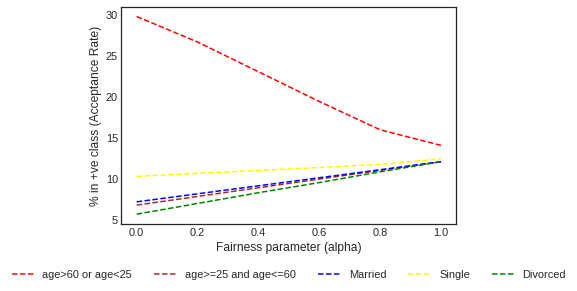

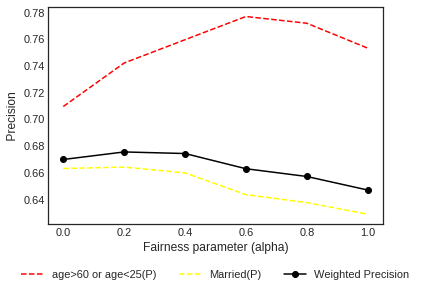

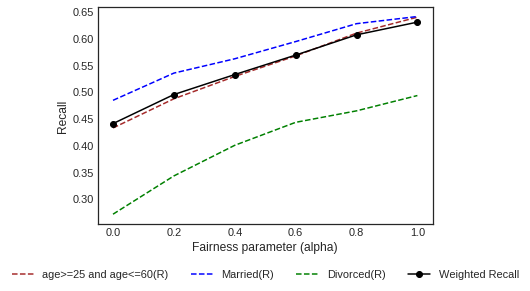

No handles with labels found to put in legend.


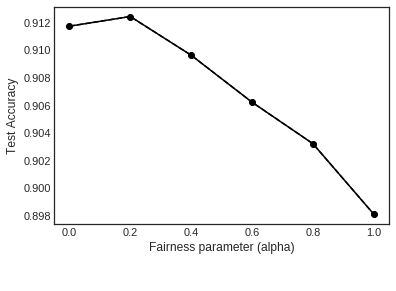

In [44]:
####--->>>  result at delta1=[.95], gama=[.07], epsilon=[.04]
import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# delta1=[.8], gama=[.15], epsilon=[.01]
import matplotlib.pyplot as plt
import numpy as np
alpha=[0 ,.2 ,.4 ,.6, .8 ,1]
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
#acceptance_rate=np.transpose(acc_rate) 
a=[acc_rate[i][0]*100 for i in range(6)]  
b=[acc_rate[i][1]*100 for i in range(6)]  
c=[acc_rate[i][2]*100 for i in range(6)]  
d=[acc_rate[i][3]*100 for i in range(6)]   
e=[acc_rate[i][4]*100 for i in range(6)]  
  



  # 's_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha,a,label='age>60 or age<25',color='red',linestyle='--') 
ax.plot(alpha,b,label='age>=25 and age<=60',color='brown',linestyle='--')  
ax.plot(alpha,c,label='Married',color='blue',linestyle='--') 
ax.plot(alpha,d,label='Single',color='yellow',linestyle='--')
ax.plot(alpha,e,label='Divorced',color='green',linestyle='--') 


plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 




import os

fig.savefig('a1.png') 

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

a=[prec[i][0] for i in range(6)]  

c=[prec[i][3] for i in range(6)]  
  
x=[weight_prec[i] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,a,label='age>60 or age<25(P)',color='red',linestyle='--') 
 
ax.plot(alpha,c,label='Married(P)',color='yellow',linestyle='--') 

ax.plot(alpha,x,label='Weighted Precision',color='black',marker='o',linestyle='-')


   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel(' Precision ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png')




#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.


b=[rec[i][1] for i in range(6)]  
 
c=[rec[i][2] for i in range(6)]   
 
e=[rec[i][4] for i in range(6)]
y=[weight_rec[i] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)



ax.plot(alpha,b,label='age>=25 and age<=60(R)',color='brown',linestyle='--')  
ax.plot(alpha,c,label='Married(R)',color='blue',linestyle='--') 
ax.plot(alpha,e,label='Divorced(R)',color='green',linestyle='--') 
ax.plot(alpha,y,label='Weighted Recall',color='black',marker='o',linestyle='-')

   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('Recall') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

 
c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

  
ax.plot(alpha,c,label='',color='black',marker='o',linestyle='-') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
plt.title('')
plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a5.png') 

In [36]:
#LP5 with beta weight mechanism on b_avg as .12
accu_all,DP_all,acc_rate,alpha,prec,rec = main(sensitive, Y_test, Y_test_pred,e )


sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
579
213
0.36787564766839376
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
11778
1175
0.09976226863644082
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
7558
748
0.09896798094734056
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
3401
497
0.14613349014995589
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
1375
140
0.10181818181818182
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
23
3
0.13043478260869565
data acceptance rates
[0.36787564766839376, 0.09976226863644082, 0.09896798094734056, 0.14613349014995589, 0.10181818181818182, 0.13043478260869565]
data DP
0.2689076667210532
sensitive attribute  1
prec reca accuracy for each sens
0.7142857142857143 0.5633802816901409 0.7564766839378239
SVM----------total , accepted, aceeptance rate:
579
168
0.29015544041450775
sensitive attribute  2
pre

In [158]:
#look for fesible beta .02 with no weight even subgroup weights
accu_all,DP_all,acc_rate,alpha,prec,rec = main(sensitive, Y_test, Y_test_pred,e )


sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
579
213
0.36787564766839376
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
11778
1175
0.09976226863644082
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
7558
748
0.09896798094734056
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
3401
497
0.14613349014995589
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
1375
140
0.10181818181818182
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
23
3
0.13043478260869565
data acceptance rates
[0.36787564766839376, 0.09976226863644082, 0.09896798094734056, 0.14613349014995589, 0.10181818181818182, 0.13043478260869565]
data DP
0.2689076667210532
sensitive attribute  1
prec reca accuracy for each sens
0.7142857142857143 0.5633802816901409 0.7564766839378239
SVM----------total , accepted, aceeptance rate:
579
168
0.29015544041450775
sensitive attribute  2
pre

In [144]:
#look for fesible beta .02 with old same LP
accu_all,DP_all,acc_rate,alpha,prec,rec = main(sensitive, Y_test, Y_test_pred,e )



sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
579
213
0.36787564766839376
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
11778
1175
0.09976226863644082
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
7558
748
0.09896798094734056
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
3401
497
0.14613349014995589
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
1375
140
0.10181818181818182
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
23
3
0.13043478260869565
data acceptance rates
[0.36787564766839376, 0.09976226863644082, 0.09896798094734056, 0.14613349014995589, 0.10181818181818182, 0.13043478260869565]
data DP
0.2689076667210532
sensitive attribute  1
prec reca accuracy for each sens
0.7142857142857143 0.5633802816901409 0.7564766839378239
SVM----------total , accepted, aceeptance rate:
579
168
0.29015544041450775
sensitive attribute  2
pre

In [146]:
''' #check
print(acc_rate)
print(prec)
print(rec)
alpha=np.arange(0,1.2,.2)  
print(accu)
print(alpha)
'''

[[0.3  0.07 0.07 0.1  0.06 0.04 0.  ]
 [0.26 0.07 0.08 0.1  0.07 0.09 0.  ]
 [0.22 0.08 0.08 0.1  0.07 0.09 0.  ]
 [0.18 0.09 0.09 0.1  0.08 0.09 0.  ]
 [0.14 0.09 0.09 0.1  0.09 0.09 0.  ]
 [0.14 0.1  0.1  0.11 0.1  0.09 0.  ]]
[[0.65 0.65 0.67 0.65 0.47 0.   0.  ]
 [0.67 0.63 0.65 0.66 0.47 0.   0.  ]
 [0.66 0.61 0.62 0.66 0.48 0.   0.  ]
 [0.61 0.6  0.6  0.65 0.48 0.   0.  ]
 [0.55 0.58 0.58 0.62 0.48 0.   0.  ]
 [0.55 0.58 0.57 0.63 0.48 0.   0.  ]]
[[0.53 0.43 0.48 0.46 0.26 0.   0.  ]
 [0.48 0.47 0.51 0.46 0.3  0.   0.  ]
 [0.4  0.49 0.52 0.46 0.35 0.   0.  ]
 [0.3  0.53 0.54 0.45 0.39 0.   0.  ]
 [0.21 0.55 0.55 0.43 0.43 0.   0.  ]
 [0.21 0.58 0.57 0.46 0.47 0.   0.  ]]
[0.914, 0.9128, 0.91, 0.9067, 0.9035, 0.9005]
[0.  0.2 0.4 0.6 0.8 1. ]


In [123]:
#look for fesible beta .02 with old same LP
accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e )

sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
579
213
0.36787564766839376
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
11778
1175
0.09976226863644082
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
7558
748
0.09896798094734056
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
3401
497
0.14613349014995589
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
1375
140
0.10181818181818182
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
23
3
0.13043478260869565
data acceptance rates
[0.36787564766839376, 0.09976226863644082, 0.09896798094734056, 0.14613349014995589, 0.10181818181818182, 0.13043478260869565]
data DP
0.2689076667210532
sensitive attribute  1
prec reca accuracy for each sens
0.7142857142857143 0.5633802816901409 0.7564766839378239
SVM----------total , accepted, aceeptance rate:
579
168
0.29015544041450775
sensitive attribute  2
pre

[  579 11778  7558  3401  1375    23]
Optimal
objective is:
785349.0
discripency is:
None
alpha, beta_avg 0.2 0.07744
<--------------------------------------->
iteration t 2
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
individual acceptance rates
[0.25734024179620035, 0.06911190354898965, 0.0723736438211167, 0.09732431637753602, 0.06036363636363636, 0.08695652173913043]
individul precision
[0.6644295302013423, 0.6388206388206388, 0.6581352833638026, 0.6646525679758308, 0.46987951807228917, 0.0]
individual recall
[0.4647887323943662, 0.4425531914893617, 0.48128342245989303, 0.4426559356136821, 0.2785714285714286, 0.0]
DP all
0.19697660543256398
precision all 0.6427829698857737
recall all 0.44596541786743515
accuracy all 0.9099295945617868
TP,FP,TN,FN
619 344 10625 769
dimension of data
6 12357
[  579 11778  7558  3401  1375    23]
Optimal
objective is:
831085.0
discripency is:
None
alpha, beta_a

sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
individual acceptance rates
[0.1381692573402418, 0.09322465613856343, 0.09407250595395607, 0.09997059688326963, 0.09090909090909091, 0.08695652173913043]
individul precision
[0.55, 0.5846994535519126, 0.5822784810126582, 0.6235294117647059, 0.48, 0.0]
individual recall
[0.20657276995305165, 0.5463829787234042, 0.553475935828877, 0.42655935613682094, 0.42857142857142855, 0.0]
DP all
0.051212735601111364
precision all 0.5823429541595926
recall all 0.4942363112391931
accuracy all 0.9033746054867686
TP,FP,TN,FN
686 492 10477 702
dimension of data
6 12357
[  579 11778  7558  3401  1375    23]
Undefined
objective is:
1637240.2
discripency is:
None
alpha, beta_avg 1 0.1
<--------------------------------------->
iteration t 6
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
individual acceptance rates
[0.13816925734

[  579 11778  7558  3401  1375    23]
Optimal
objective is:
2350546.0
discripency is:
None
alpha, beta_avg 0.4 0.2
<--------------------------------------->
iteration t 3
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
individual acceptance rates
[0.26252158894645944, 0.12022414671421294, 0.12265149510452501, 0.14142899147309615, 0.11418181818181818, 0.13043478260869565]
individul precision
[0.6776315789473685, 0.536723163841808, 0.5329018338727076, 0.6195426195426196, 0.45222929936305734, 0.0]
individual recall
[0.4835680751173709, 0.6468085106382979, 0.660427807486631, 0.5995975855130785, 0.5071428571428571, 0.0]
DP all
0.14833977076464128
precision all 0.5503826530612245
recall all 0.6217579250720461
accuracy all 0.9004612770089827
TP,FP,TN,FN
863 705 10264 525
dimension of data
6 12357
[  579 11778  7558  3401  1375    23]
Optimal
objective is:
3500934.0
discripency is:
None
alpha, beta_avg 0.

sensitive attribute  6
individual acceptance rates
[0.25215889464594127, 0.250042452029207, 0.25006615506747815, 0.2502205233754778, 0.25018181818181817, 0.2608695652173913]
individul precision
[0.636986301369863, 0.3392190152801358, 0.328042328042328, 0.43243243243243246, 0.29941860465116277, 0.16666666666666666]
individual recall
[0.43661971830985913, 0.8502127659574468, 0.8288770053475936, 0.7404426559356136, 0.7357142857142858, 0.3333333333333333]
DP all
0.0108271131881843
precision all 0.3532837269492074
recall all 0.7867435158501441
accuracy all 0.8142753095411508
TP,FP,TN,FN
1092 1999 8970 296
<--------------------------------------->


In [40]:
accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred,e )

#look for fesible beta .01 changed lp





sensitive attribute  1
ACTUAL----------total ,accepted, aceeptance rate:
579
213
0.36787564766839376
sensitive attribute  2
ACTUAL----------total ,accepted, aceeptance rate:
11778
1175
0.09976226863644082
sensitive attribute  3
ACTUAL----------total ,accepted, aceeptance rate:
7558
748
0.09896798094734056
sensitive attribute  4
ACTUAL----------total ,accepted, aceeptance rate:
3401
497
0.14613349014995589
sensitive attribute  5
ACTUAL----------total ,accepted, aceeptance rate:
1375
140
0.10181818181818182
sensitive attribute  6
ACTUAL----------total ,accepted, aceeptance rate:
23
3
0.13043478260869565
data acceptance rates
[0.36787564766839376, 0.09976226863644082, 0.09896798094734056, 0.14613349014995589, 0.10181818181818182, 0.13043478260869565]
data DP
0.2689076667210532
sensitive attribute  1
prec reca accuracy for each sens
0.7142857142857143 0.5633802816901409 0.7564766839378239
SVM----------total , accepted, aceeptance rate:
579
168
0.29015544041450775
sensitive attribute  2
pre

[  579 11778  7558  3401  1375    23]
Optimal
objective is:
785349.0
discripency is:
None
alpha, beta_avg 0.2 0.07744
<--------------------------------------->
iteration t 2
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
individual acceptance rates
[0.25734024179620035, 0.06911190354898965, 0.0723736438211167, 0.09732431637753602, 0.06036363636363636, 0.08695652173913043]
individul precision
[0.6644295302013423, 0.6388206388206388, 0.6581352833638026, 0.6646525679758308, 0.46987951807228917, 0.0]
individual recall
[0.4647887323943662, 0.4425531914893617, 0.48128342245989303, 0.4426559356136821, 0.2785714285714286, 0.0]
DP all
0.19697660543256398
precision all 0.6427829698857737
recall all 0.44596541786743515
accuracy all 0.9099295945617868
TP,FP,TN,FN
619 344 10625 769
dimension of data
6 12357
[  579 11778  7558  3401  1375    23]
Optimal
objective is:
831085.0
discripency is:
None
alpha, beta_a

sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
individual acceptance rates
[0.1381692573402418, 0.09322465613856343, 0.09407250595395607, 0.09997059688326963, 0.09090909090909091, 0.08695652173913043]
individul precision
[0.55, 0.5846994535519126, 0.5822784810126582, 0.6235294117647059, 0.48, 0.0]
individual recall
[0.20657276995305165, 0.5463829787234042, 0.553475935828877, 0.42655935613682094, 0.42857142857142855, 0.0]
DP all
0.051212735601111364
precision all 0.5823429541595926
recall all 0.4942363112391931
accuracy all 0.9033746054867686
TP,FP,TN,FN
686 492 10477 702
dimension of data
6 12357
[  579 11778  7558  3401  1375    23]
Undefined
objective is:
1639193.06
discripency is:
None
alpha, beta_avg 1 0.1
<--------------------------------------->
iteration t 6
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
individual acceptance rates
[0.1088082901

precision all 0.5992094861660079
recall all 0.5461095100864554
accuracy all 0.9079873755765963
TP,FP,TN,FN
758 507 10462 630
dimension of data
6 12357
[  579 11778  7558  3401  1375    23]
Optimal
objective is:
2350546.0
discripency is:
None
alpha, beta_avg 0.4 0.2
<--------------------------------------->
iteration t 3
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
individual acceptance rates
[0.26252158894645944, 0.12022414671421294, 0.12265149510452501, 0.14142899147309615, 0.11418181818181818, 0.13043478260869565]
individul precision
[0.6776315789473685, 0.536723163841808, 0.5329018338727076, 0.6195426195426196, 0.45222929936305734, 0.0]
individual recall
[0.4835680751173709, 0.6468085106382979, 0.660427807486631, 0.5995975855130785, 0.5071428571428571, 0.0]
DP all
0.14833977076464128
precision all 0.5503826530612245
recall all 0.6217579250720461
accuracy all 0.9004612770089827
TP,FP,TN,FN
86

[  579 11778  7558  3401  1375    23]
Undefined
objective is:
9830676.190000001
discripency is:
None
alpha, beta_avg 1 0.25
<--------------------------------------->
iteration t 6
sensitive attribute  1
sensitive attribute  2
sensitive attribute  3
sensitive attribute  4
sensitive attribute  5
sensitive attribute  6
individual acceptance rates
[0.24870466321243523, 0.24978773985396502, 0.24993384493252183, 0.24963246104087033, 0.24945454545454546, 0.21739130434782608]
individul precision
[0.6388888888888888, 0.33956492182188985, 0.328215987294865, 0.43227326266195526, 0.30029154518950435, 0.2]
individual recall
[0.431924882629108, 0.8502127659574468, 0.8288770053475936, 0.738430583501006, 0.7357142857142858, 0.3333333333333333]
DP all
0.032542540584695745
precision all 0.3535320803629294
recall all 0.7860230547550432
accuracy all 0.8145180869142996
TP,FP,TN,FN
1091 1995 8974 297
<--------------------------------------->


In [11]:
import numpy as np
acc_rate=[[0.2970639032815199, 0.06707420614705382, 0.07105054247155332, 0.10202881505439576, 0.056, 0.043478260869565216],
[0.25734024179620035, 0.06911190354898965, 0.0723736438211167, 0.09732431637753602, 0.06036363636363636, 0.08695652173913043],
[0.21243523316062177, 0.07123450500933945, 0.07369674517068008, 0.09232578653337253, 0.06472727272727273, 0.08695652173913043],
[0.16753022452504318, 0.07327220241127526, 0.07488753638528711, 0.08732725668920906, 0.06909090909090909, 0.08695652173913043],
[0.12435233160621761, 0.07539480387162506, 0.07621063773485048, 0.0826227580123493, 0.07345454545454545, 0.08695652173913043],
[0.08635578583765112, 0.07751740533197486, 0.07753373908441387, 0.07880035283740076, 0.07781818181818181, 0.08695652173913043]]

prec=[[0.7151162790697675, 0.6506329113924051, 0.6759776536312849, 0.6628242074927954, 0.5714285714285714, 0.0],
    [0.7449664429530202, 0.6461916461916462, 0.6709323583180987, 0.6737160120845922, 0.5662650602409639, 0.0],
[0.7804878048780488, 0.6388557806912991, 0.6660682226211849, 0.6687898089171974, 0.5730337078651685, 0.0],
[0.7731958762886598, 0.6338354577056778, 0.6537102473498233, 0.6666666666666666, 0.5684210526315789, 0.0],
[0.7777777777777778, 0.6193693693693694, 0.6319444444444444, 0.6690391459074733, 0.5346534653465347, 0.0],
[0.8035714285714286, 0.6107456140350878, 0.6125211505922166, 0.6865671641791045, 0.5233644859813084, 0.0]]

rec=[[0.5774647887323944, 0.4374468085106383, 0.4852941176470588, 0.46277665995975853, 0.3142857142857143, 0.0],
[0.5211267605633803, 0.44765957446808513, 0.49064171122994654, 0.448692152917505, 0.3357142857142857, 0.0],
[0.4507042253521127, 0.45617021276595743, 0.4959893048128342, 0.4225352112676056, 0.36428571428571427, 0.0],
[0.352112676056338, 0.465531914893617, 0.4946524064171123, 0.3983903420523139, 0.38571428571428573, 0.0],
[0.26291079812206575, 0.46808510638297873, 0.48663101604278075, 0.3782696177062374, 0.38571428571428573,0.0],
[0.2112676056338028, 0.47404255319148936, 0.4839572192513369, 0.3702213279678068, 0.4, 0.0]]


accu=[.9129,.9128, .9121,.9106,.9080, 0.9067]
#P R R P R R        
#0.4821  0.4774  0.4799  0.6459  0.3642
#0.7058 0.4468 0.4438 0.6417  0.4071

weighted_precision=[]
weighted_recall=[]
p=[0,3]
r=[1,2,4]
print(np.transpose(acc_rate))
weight_prec=0
weight_p=0
weight_rec=0
weight_r=0
dp_list=[]
     
sizes=[579, 11778, 7558, 3401,1375]
for i in range(6):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(5):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        acc_list.append(acc_rate[i][j])
    #print(acc_list)
    dp=max(acc_list)-min(acc_list)   
    dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu,dp_list)          

[[0.2970639  0.25734024 0.21243523 0.16753022 0.12435233 0.08635579]
 [0.06707421 0.0691119  0.07123451 0.0732722  0.0753948  0.07751741]
 [0.07105054 0.07237364 0.07369675 0.07488754 0.07621064 0.07753374]
 [0.10202882 0.09732432 0.09232579 0.08732726 0.08262276 0.07880035]
 [0.056      0.06036364 0.06472727 0.06909091 0.07345455 0.07781818]
 [0.04347826 0.08695652 0.08695652 0.08695652 0.08695652 0.08695652]]
[0.6704315214232143, 0.6840813385853006, 0.6850393414954218, 0.6821642577146902, 0.6848581579308166, 0.7035886388231135] [0.4467309308559521, 0.4559128803253434, 0.4646010713570423, 0.47085968442734294, 0.46938442108479567, 0.4727450077056138] [0.9129, 0.9128, 0.9121, 0.9106, 0.908, 0.9067] [0.2410639032815199, 0.19697660543256398, 0.14770796043334905, 0.09843931543413409, 0.05089778615167216, 0.008838380505676258]


In [13]:
weight_prec=weighted_precision
weight_rec=weighted_recall
accu==accu
dp_a=[0.2410639032815199, 0.19697660543256398, 0.14770796043334905, 0.09843931543413409, 0.05089778615167216, 0.008838380505676258]
#P R R P R
#->1 4 5 6
'''
0.6537,0.6704
0.4390,0.4467
0.9104,0.9129

0.6587,0.6821
0.4500,0.4708
0.9075,0.9106

0.6528,0.6848
0.4541,0.4693
0.9062,0.908

0.6477,0.7035
0.4568,0.4727
0.9044,0.9067


'''
'''
[0.6537399314783152, 0.6591800262507629, 0.6622803307440085, 0.6587194178787859, 0.6528199923584302, 0.6477083296726733] 
[0.4390498019862777, 0.44242498574518574, 0.44596605042551524, 0.45002671372726866, 0.4541023990251574, 0.4568930449817998] 
[0.9104, 0.9099, 0.909, 0.9075, 0.9062, 0.9044]
'''

'\n[0.6537399314783152, 0.6591800262507629, 0.6622803307440085, 0.6587194178787859, 0.6528199923584302, 0.6477083296726733] \n[0.4390498019862777, 0.44242498574518574, 0.44596605042551524, 0.45002671372726866, 0.4541023990251574, 0.4568930449817998] \n[0.9104, 0.9099, 0.909, 0.9075, 0.9062, 0.9044]\n'

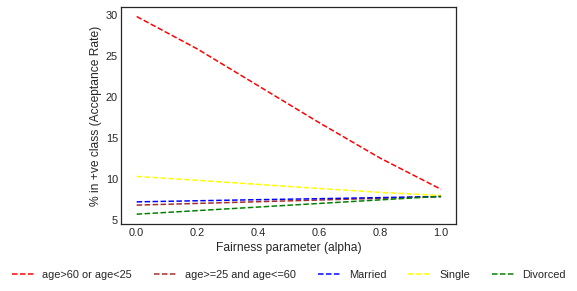

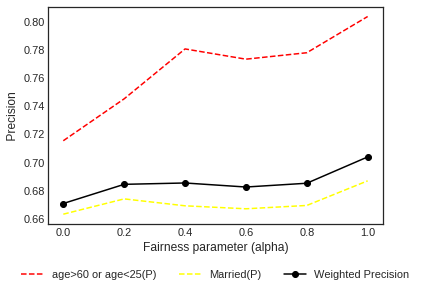

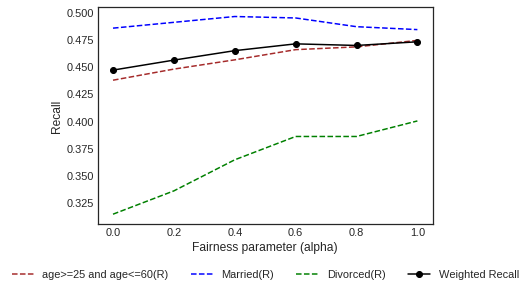

No handles with labels found to put in legend.


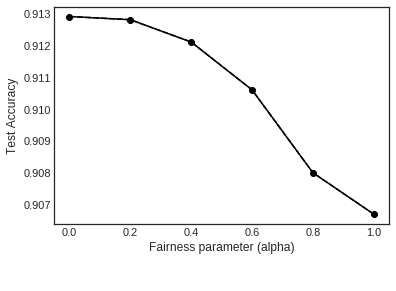

In [54]:
####--->>>  result at delta1=[.95], gama=[.07], epsilon=[.04]
import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# delta1=[.8], gama=[.15], epsilon=[.01]
import matplotlib.pyplot as plt
import numpy as np
alpha=[0 ,.2 ,.4 ,.6, .8 ,1]
#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
#acceptance_rate=np.transpose(acc_rate) 
a=[acc_rate[i][0]*100 for i in range(6)]  
b=[acc_rate[i][1]*100 for i in range(6)]  
c=[acc_rate[i][2]*100 for i in range(6)]  
d=[acc_rate[i][3]*100 for i in range(6)]   
e=[acc_rate[i][4]*100 for i in range(6)]  
  



  # 's_male', 's_female'  ,'r_white', 'r_black', 'r_asian-pac-islander','r_amer-indian-eskimo'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha,a,label='age>60 or age<25',color='red',linestyle='--') 
ax.plot(alpha,b,label='age>=25 and age<=60',color='brown',linestyle='--')  
ax.plot(alpha,c,label='Married',color='blue',linestyle='--') 
ax.plot(alpha,d,label='Single',color='yellow',linestyle='--')
ax.plot(alpha,e,label='Divorced',color='green',linestyle='--') 


plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 




import os

fig.savefig('a1.png') 

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

a=[prec[i][0] for i in range(6)]  

c=[prec[i][3] for i in range(6)]  
  
x=[weight_prec[i] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

ax.plot(alpha,a,label='age>60 or age<25(P)',color='red',linestyle='--') 
 
ax.plot(alpha,c,label='Married(P)',color='yellow',linestyle='--') 

ax.plot(alpha,x,label='Weighted Precision',color='black',marker='o',linestyle='-')


   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel(' Precision ') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png')




#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.


b=[rec[i][1] for i in range(6)]  
 
c=[rec[i][2] for i in range(6)]   
 
e=[rec[i][4] for i in range(6)]
y=[weight_rec[i] for i in range(6)] 

'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)



ax.plot(alpha,b,label='age>=25 and age<=60(R)',color='brown',linestyle='--')  
ax.plot(alpha,c,label='Married(R)',color='blue',linestyle='--') 
ax.plot(alpha,e,label='Divorced(R)',color='green',linestyle='--') 
ax.plot(alpha,y,label='Weighted Recall',color='black',marker='o',linestyle='-')

   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('Recall') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 

#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.

 
c=[accu[i] for i in range(6)]  


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)

  
ax.plot(alpha,c,label='',color='black',marker='o',linestyle='-') 



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% Test Accuracy') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
#plt.show() 
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
plt.title('')
plt.plot(alpha, c,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)
plt.savefig('a5.png') 

In [15]:
import numpy as np
acc_rate=[[0.2970639032815199, 0.06707420614705382, 0.07105054247155332, 0.10202881505439576, 0.056, 0.043478260869565216],
[0.25734024179620035, 0.06911190354898965, 0.0723736438211167, 0.09732431637753602, 0.06036363636363636, 0.08695652173913043],
[0.21243523316062177, 0.07123450500933945, 0.07369674517068008, 0.09232578653337253, 0.06472727272727273, 0.08695652173913043],
[0.16753022452504318, 0.07327220241127526, 0.07488753638528711, 0.08732725668920906, 0.06909090909090909, 0.08695652173913043],
[0.12435233160621761, 0.07539480387162506, 0.07621063773485048, 0.0826227580123493, 0.07345454545454545, 0.08695652173913043],
[0.08635578583765112, 0.07751740533197486, 0.07753373908441387, 0.07880035283740076, 0.07781818181818181, 0.08695652173913043]]

prec=[[0.7151162790697675, 0.6506329113924051, 0.6759776536312849, 0.6628242074927954, 0.5714285714285714, 0.0],
    [0.7449664429530202, 0.6461916461916462, 0.6709323583180987, 0.6737160120845922, 0.5662650602409639, 0.0],
[0.7804878048780488, 0.6388557806912991, 0.6660682226211849, 0.6687898089171974, 0.5730337078651685, 0.0],
[0.7731958762886598, 0.6338354577056778, 0.6537102473498233, 0.6666666666666666, 0.5684210526315789, 0.0],
[0.7777777777777778, 0.6193693693693694, 0.6319444444444444, 0.6690391459074733, 0.5346534653465347, 0.0],
[0.8035714285714286, 0.6107456140350878, 0.6125211505922166, 0.6865671641791045, 0.5233644859813084, 0.0]]

rec=[[0.5774647887323944, 0.4374468085106383, 0.4852941176470588, 0.46277665995975853, 0.3142857142857143, 0.0],
[0.5211267605633803, 0.44765957446808513, 0.49064171122994654, 0.448692152917505, 0.3357142857142857, 0.0],
[0.4507042253521127, 0.45617021276595743, 0.4959893048128342, 0.4225352112676056, 0.36428571428571427, 0.0],
[0.352112676056338, 0.465531914893617, 0.4946524064171123, 0.3983903420523139, 0.38571428571428573, 0.0],
[0.26291079812206575, 0.46808510638297873, 0.48663101604278075, 0.3782696177062374, 0.38571428571428573,0.0],
[0.2112676056338028, 0.47404255319148936, 0.4839572192513369, 0.3702213279678068, 0.4, 0.0]]


accu=[.9129,.9128, .9121,.9106,.9080, 0.9067]
#P R R P R R        
#0.4821  0.4774  0.4799  0.6459  0.3642
#0.7058 0.4468 0.4438 0.6417  0.4071

weighted_precision=[]
weighted_recall=[]
p=[0,3]
r=[1,2,4]
print(np.transpose(acc_rate))
weight_prec=0
weight_p=0
weight_rec=0
weight_r=0
dp_list=[]
     
sizes=[579, 11778, 7558, 3401,1375]
for i in range(6):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    acc_list=[]
    for j in range(5):
        #print(j)
        if j in p:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            #print(j)
        if j in r:    
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
        #print(acc_rate[i][j])    
        acc_list.append(acc_rate[i][j])
    #print(acc_list)
    dp=max(acc_list)-min(acc_list)   
    dp_list.append(dp)     
    wp=weight_prec/weight_p
    wr=weight_rec/weight_r
    weighted_precision.append(wp)
    weighted_recall.append(wr)
print(weighted_precision, weighted_recall,accu,dp_list) 


weight_prec=weighted_precision
weight_rec=weighted_recall
accu==accu
dp_a=[0.2410639032815199, 0.19697660543256398, 0.14770796043334905, 0.09843931543413409, 0.05089778615167216, 0.008838380505676258]


[[0.2971 0.2573 0.2124 0.1675 0.1244 0.0864]
 [0.0671 0.0691 0.0712 0.0733 0.0754 0.0775]
 [0.0711 0.0724 0.0737 0.0749 0.0762 0.0775]
 [0.102  0.0973 0.0923 0.0873 0.0826 0.0788]
 [0.056  0.0604 0.0647 0.0691 0.0735 0.0778]
 [0.0435 0.087  0.087  0.087  0.087  0.087 ]]
[0.6704315214232143, 0.6840813385853006, 0.6850393414954218, 0.6821642577146902, 0.6848581579308166, 0.7035886388231135] [0.4467309308559521, 0.4559128803253434, 0.4646010713570423, 0.47085968442734294, 0.46938442108479567, 0.4727450077056138] [0.9129, 0.9128, 0.9121, 0.9106, 0.908, 0.9067] [0.2410639032815199, 0.19697660543256398, 0.14770796043334905, 0.09843931543413409, 0.05089778615167216, 0.008838380505676258]


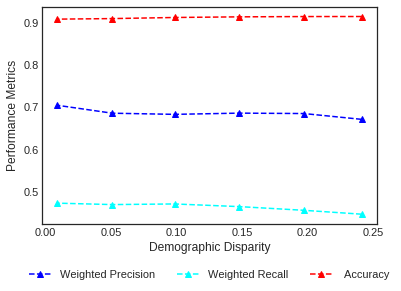

In [16]:
#This is the above results with DP variations
#P R P R P R R 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')


fig = plt.figure()
ax = plt.subplot(111)
'''
ax.plot(dp,y1,label='Weighted Precision',color='blue',marker='^',linestyle='-')  
ax.plot(dp,y2,label='Weighted Recall',color='cyan',marker='^',linestyle='-')
ax.plot(dp,y3,label=' Accuracy',color='red',marker='^',linestyle='-')
'''
ax.plot(dp_a,weight_prec,label='Weighted Precision',color='blue',marker='^',linestyle='--')  
ax.plot(dp_a,weight_rec,label='Weighted Recall',color='cyan',marker='^',linestyle='--')
ax.plot(dp_a,accu,label=' Accuracy',color='red',marker='^',linestyle='--')

   
plt.title('')
ax.set_xlabel('Demographic Disparity')
ax.set_ylabel('Performance Metrics') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 




In [17]:
prec=[[0.6521739130434783, 0.6539278131634819, 0.6887417218543046, 0.7279411764705882, 0.2909090909090909, 0.0],
[0.7142857142857143, 0.6360544217687075, 0.6790450928381963, 0.6941176470588235, 0.29411764705882354, 0.0],
[0.7352941176470589, 0.6260623229461756, 0.673289183222958, 0.6813725490196079, 0.2804878048780488, 0.0],
[0.7608695652173914, 0.578556263269639, 0.6225165562913907, 0.6544117647058824, 0.23636363636363636, 0.0],
[0.7790697674418605, 0.4535673839184598, 0.4651368049426302, 0.5941176470588235, 0.18446601941747573, 0.0],
[0.7739130434782608, 0.3842887473460722, 0.3831899404367968, 0.5367647058823529, 0.1781818181818182, 0.25],
[0.7283950617283951, 0.30087958750379135, 0.29820415879017015, 0.43067226890756305, 0.17662337662337663, 0.16666666666666666],
          [0.7167630057803468, 0.28474384375884515, 0.28054697838553155, 0.4117647058823529, 0.17475728155339806, 0.2857142857142857]
]

rec=[[0.07042253521126761, 0.2621276595744681, 0.27807486631016043, 0.19919517102615694, 0.11428571428571428, 0.0],
[0.09389671361502347, 0.31829787234042556, 0.3422459893048128, 0.23742454728370221, 0.14285714285714285, 0.0],
[0.11737089201877934, 0.37617021276595747, 0.4077540106951872, 0.2796780684104628, 0.16428571428571428, 0.0],
[0.1643192488262911, 0.46382978723404256, 0.5026737967914439, 0.358148893360161, 0.18571428571428572, 0.0],
[0.3145539906103286, 0.6817021276595745, 0.7045454545454546, 0.6096579476861167, 0.2714285714285714, 0.0],
[0.41784037558685444, 0.7702127659574468, 0.7740641711229946, 0.7344064386317908, 0.35, 0.3333333333333333],
[0.5539906103286385, 0.8442553191489361, 0.8435828877005348, 0.8249496981891348, 0.4857142857142857, 0.3333333333333333],
       [0.5821596244131455, 0.8561702127659574, 0.8502673796791443, 0.8450704225352113, 0.5142857142857142, 0.6666666666666666]
]

accu=[0.8999, 0.9015 , 0.9033 ,0.9015 ,0.8782 ,0.8486, 0.7874, 0.7706]

beta=[.04,.05,.06,.08,.15,.20,.28,.3]

beta_p=[]
beta_r=[]
beta_check=[0.0434,.0567,.0692,.0717,.1020,.29]



import numpy as np


#P R P R P R R 
#0.7251,0.8101 0.5470,0.7329 0.6311,0.7389 0.5308,0.6172 0.6764,0.4776  0.4666,0.5333  0.2666,0.7333
#      
weighted_precision=[]
weighted_recall=[]
#p=[]
#r=[0,2,4,1,3,5,6]

dp_list=[]
sizes=[579, 11778, 7558, 3401,1375,23]
for i in range(8):
    weight_prec=0
    weight_p=0
    weight_rec=0
    weight_r=0
    cnt1=0
    cnt2=0
    for j in range(6):
        #print(j)
              
        
        if beta[i] <=beta_check[j]:
            weight_prec=weight_prec+sizes[j]*prec[i][j]
            weight_p=weight_p+sizes[j]
            cnt1=1
        else:  
            weight_rec=weight_rec+sizes[j]*rec[i][j]
            weight_r=weight_r+sizes[j]
            cnt2=1
    if cnt1==1:
        wp=weight_prec/weight_p
        weighted_precision.append(wp)
        beta_p.append(beta[i])

    if cnt2==1: 
        wr=weight_rec/weight_r
        weighted_recall.append(wr) 
        beta_r.append(beta[i])
            
   
    
    
len1=(len(weighted_precision)) 
len2=(len(weighted_recall)) 
    
print(weighted_precision, weighted_recall,beta_p,beta_r,len1,len2)
'''
[0.9520125938773091, 0.9403591343418822, 0.8608764055619338],0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338
0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613,0.6476895465902177, 0.7070185074558867, 0.754950250161771
'''

[0.6539131000260164, 0.6376124994247303, 0.6305525951057798, 0.23247496423462088, 0.0, 0.25, 0.16666666666666666] [0.09389671361502347, 0.36404390324806346, 0.4535684088857701, 0.6473139982741551, 0.7347956274774579, 0.8146170768278111, 0.8272203909373664] [0.04, 0.05, 0.06, 0.08, 0.15, 0.2, 0.28] [0.05, 0.06, 0.08, 0.15, 0.2, 0.28, 0.3] 7 7


'\n[0.9520125938773091, 0.9403591343418822, 0.8608764055619338],0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338\n0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613,0.6476895465902177, 0.7070185074558867, 0.754950250161771\n'

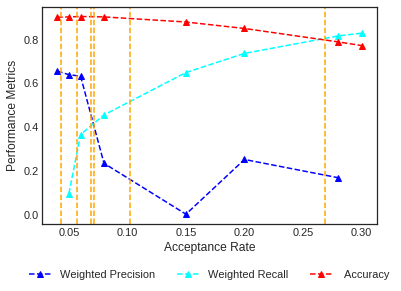

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=4)  # For compact display.
plt.style.use('seaborn-white')


'''
y1=savgol_filter(a, 6, 2)
y2=savgol_filter(b, 6, 2)
y3=savgol_filter(c, 6, 2)
y4=savgol_filter(d, 6, 2)
y5=savgol_filter(e, 6, 2)
y6=savgol_filter(f, 6, 2)
y7=savgol_filter(g, 6, 2)
'''



fig = plt.figure()
ax = plt.subplot(111)
weighted_precision=[0.6539131000260164, 0.6376124994247303, 0.6305525951057798, 0.23247496423462088, 0.0, 0.25, 0.16666666666666666] 
weighted_recall=[0.09389671361502347, 0.36404390324806346, 0.4535684088857701, 0.6473139982741551, 0.7347956274774579, 0.8146170768278111, 0.8272203909373664]
beta1=[0.04, 0.05, 0.06, 0.08, 0.15, 0.2, 0.28]
beta2=[0.05, 0.06, 0.08, 0.15, 0.2, 0.28, 0.3]
accu=[0.8999, 0.9015 , 0.9033 ,0.9015 ,0.8782 ,0.8486, 0.7874, 0.7706]

'''
weighted_precision=[0.9520125938773091, 0.9403591343418822, 0.8608764055619338,0.8561212064210523, 0.8128034718440105, 0.782912341254576, 0.7358009995069338]
weighted_recall=[0.4610404591572201, 0.5551300667433751, 0.5983458776930215, 0.6580824258162613,0.6476895465902177, 0.7070185074558867, 0.754950250161771]
beta1=[.02,.025,.05,.1,.14,.16,.2]
beta2=[.1,.14,.16,.2,.25,.3,.35]

accu=[ 0.7774,0.7813,0.7954,0.8157,0.82442,0.8245,0.8216,0.8146,0.7954,0.7699]
'''
ax.plot(beta1,weighted_precision,label='Weighted Precision',color='blue',marker='^',linestyle='--')  
ax.plot(beta2,weighted_recall,label='Weighted Recall',color='cyan',marker='^',linestyle='--')
ax.plot(beta,accu,label=' Accuracy',color='red',marker='^',linestyle='--')
#ax.vlines(y=[.1992], ymin=[0], ymax=[1], colors='purple', linestyles='--', lw=2, label='PRedict avg. acc.')
#plt.axvline(.1992, color='green', linestyle='--')
#plt.axvline(.10, color='orange', linestyle='--')
#plt.axvline(.20, color='orange', linestyle='--')
plt.axvline(0.0434, color='orange', linestyle='--')
plt.axvline(0.0567, color='orange', linestyle='--')
plt.axvline(0.0692, color='orange', linestyle='--')
plt.axvline(0.0717, color='orange', linestyle='--')
plt.axvline(0.1020, color='orange', linestyle='--')
plt.axvline(0.2689, color='orange', linestyle='--')

 


plt.title('')
ax.set_xlabel('Acceptance Rate')
ax.set_ylabel('Performance Metrics') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 
fig.savefig('a2.png') 